## Newton's Method

Li Liu

7/9/2019

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sy
from scipy import optimize
from autograd import numpy as anp
from autograd import grad
from autograd import elementwise_grad

### Pbm 1

In [14]:
def newton_method(f, x0, fp, tol=1e-5, maxiters=15):
    converged = False
    num_iters = maxiters
    for k in range(maxiters):
        x1 = x0 - f(x0)/fp(x0)
        if abs(x1-x0) < tol:
            converged = True
            num_iters = k+1
            break
        x0 = x1
    return x0, converged, num_iters

f = lambda x: np.exp(x) - 2
fp = lambda x: np.exp(x)

newton_method(f, 2, fp)

(0.6931471814512683, True, 6)

In [17]:
optimize.newton(f,2,fp)

0.6931471805599453

### Pbm 3

In [18]:
def newton_method_modified(f, x0, fp, alpha=1, tol=1e-5, maxiters=15):
    converged = False
    num_iters = maxiters
    for k in range(maxiters):
        x1 = x0 - alpha*f(x0)/fp(x0)
        if abs(x1-x0) < tol:
            converged = True
            num_iters = k+1
            break
        x0 = x1
    return x0, converged, num_iters

f = lambda x : anp.sign(x)*anp.power(anp.abs(x), 1./3)
fp = grad(f)

newton_method_modified(f, .01, fp, alpha=1)

(-327.6800000000008, False, 15)

In [20]:
newton_method_modified(f, .01, fp, alpha=.4)

(-3.199999999999966e-06, True, 6)

### Pbm 4

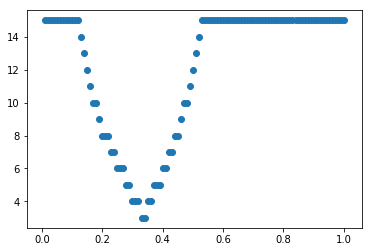

0.33

In [21]:
agrid = np.linspace(0,1,101)
f = lambda x : anp.sign(x)*anp.power(anp.abs(x), 1./3)
fp = grad(f)

def newton_method_alpha(f, x0, fp, tol=1e-5, maxiters=15):
    xpoints = []
    ypoints = []
    for alpha in agrid:
        xpoints.append(alpha)
        ypoints.append(newton_method_modified(f, x0, fp, alpha)[2])
    x = np.array(xpoints[1:])
    y = np.array(ypoints[1:])
    plt.scatter(x, y)
    plt.show()
    return(x[np.argmin(y)])

newton_method_alpha(f, .01, fp)

### Pbm 7

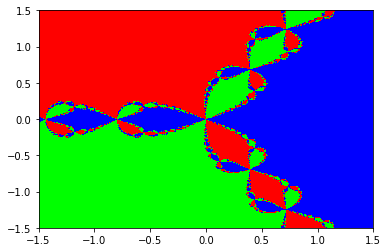

In [22]:
def basins_of_attraction(f, Df, zeros, bounds, res, iters):
    rmin, rmax, imin, imax = bounds
    x_real = np.linspace(rmin, rmax, res)
    x_imag = np.linspace(imin, imax, res)
    X_real, X_imag = np.meshgrid(x_real, x_imag)
    X_0 = X_real + 1j*X_imag
    for i in range(iters):
        X_1 = X_0 - f(X_0)/Df(X_0)
        X_0 = X_1
    Y = []
    for x in X_0.flatten():
        dist_2 = (zeros - x)**2        
        Y.append(np.argmin(dist_2))
    Y = np.array(Y)
    Y = np.reshape(Y, (500,500))
    plt.pcolormesh(X_real, X_imag, Y, cmap="brg")
    
f = lambda x: np.power(x,3)-1
Df = lambda x: 3*np.power(x,2)

res = 500
bounds = [-1.5, 1.5, -1.5, 1.5]
iters = 20
zeros = np.array([1, -1/2 + np.sqrt(3)/2j, -1/2 - np.sqrt(3)/2j])

basins_of_attraction(f, Df, zeros, bounds, res, iters)


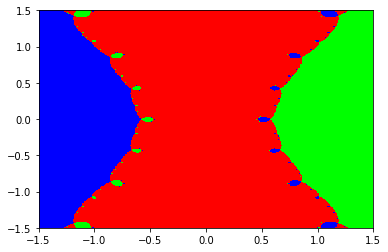

In [23]:
f = lambda x: np.power(x,3)-x
Df = lambda x: 3*np.power(x,2) - 1
zeros = np.array([-1,0,1])

basins_of_attraction(f, Df, zeros, bounds, res, iters)